<a href="https://colab.research.google.com/github/affonso-rafael/projeto-avaliativo-lp-ppgi-utfpr-cp/blob/main/projeto-avaliativo-ppgi-utfpr-cp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Programa de Pós-graduação em Informática - PPGI UTFPR**
## **Disciplina de Linguagem de Programação**

###Profs. Dr. Adriano Rivolli da Silva e Dr. Marlon Marcon

Esse notebook é um exemplo de trabalho da disciplina de Linguagem de Programação.


Para realizar a tarefa proposta, primeiramente vamos precisar instalar e importar as bibliotecas necessárias: pandas e matplotlib. Para isso, basta executar os seguintes comandos no prompt de comando:


In [ ]:
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Com as bibliotecas instaladas, podemos começar a trabalhar no Jupyter Notebook.

# Importando as bibliotecas
Vamos começar importando as bibliotecas que vamos usar em nosso código.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Parametrização dos dados

In [ ]:
#parâmetrização das entradas
import time
from datetime import datetime


data_inicio = "01-01-2021"
data_fim = "04-12-2023"


data_inicio_mills = round(datetime.strptime(data_inicio, '%m-%d-%Y').timestamp())
data_fim_mills = round(datetime.strptime(data_fim, '%m-%d-%Y').timestamp())

url = f'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1={data_inicio_mills}&period2={data_fim_mills}&interval=1d&events=history&includeAdjustedClose=true'

# Lendo os dados de cotações de bitcoin
Em seguida, faremos uma requisição à API do Yahoo Finance para obter os dados históricos de cotação do Bitcoin:


In [ ]:
df = pd.read_csv(url)

Neste caso, estamos requisitando os dados de 1º de janeiro de 2021 até 31 de dezembro de 2022, com intervalo diário (`interval=1d`). O parâmetro `includeAdjustedClose` indica que queremos os preços ajustados.

Com os dados obtidos, podemos verificar a aparência do dataframe utilizando o método `head()`. Este método retorna as primeiras cinco linhas do dataframe:

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,4.073030e+10
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,8.116348e+10
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10


Como podemos observar, temos as colunas `Date` (data), `Open` (preço de abertura), `High` (preço máximo), `Low` (preço mínimo), `Close` (preço de fechamento), `Adj Close` (preço de fechamento ajustado) e `Volume` (volume de negociação).

Podemos também compreender melhor como estão organizados os dados

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,830.000000,830.000000,830.000000,830.000000,830.000000,8.300000e+02
mean,36086.965251,36982.111286,35073.558975,36082.209839,36082.209839,3.687414e+10
std,13883.101343,14257.893781,13436.648459,13876.630279,13876.630279,2.087086e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.714767e+09
25%,22510.065918,23002.065918,22029.138672,22508.751465,22508.751465,2.497583e+10
50%,36607.708985,37604.328125,34824.539062,36602.607422,36602.607422,3.212314e+10
75%,46878.025391,48041.381836,45692.674805,46841.706055,46841.706055,4.312966e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


# Limpando os dados
Antes de gerarmos os gráficos, precisamos limpar os dados para torná-los mais fáceis de serem visualizados.

Agora que temos os dados, podemos realizar a limpeza dos mesmos. Para começar, vamos verificar se há valores nulos no dataframe:

Agora que temos os dados, podemos realizar a limpeza dos mesmos. Para começar, vamos verificar se há valores nulos no dataframe. Este código retorna a soma dos valores nulos em cada coluna:

In [ ]:
df.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

Podemos ver que não existem valores nulos neste dataset. Caso existam valores nulos, deve-se uitlizar a função `dropna()`.

In [ ]:
df.dropna(inplace=True)

Agora que removemos as linhas com valores nulos, podemos seguir com a limpeza dos dados. Para começar, vamos transformar a coluna Date em um objeto do tipo datetime, que é mais adequado para trabalhar com datas no Pandas:

In [ ]:
df['Date'][1] = '2021-01-01'
df['Date'] = pd.to_datetime(df['Date'])
df.head()

<ipython-input-65-9590968e6399>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][1] = '2021-01-01'


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,4.073030e+10
1,2021-01-01,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,8.116348e+10
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10


Agora, vamos definir a coluna `Date` como o índice do dataframe:

In [ ]:
#df.set_index('Date', inplace=True)

Também podemos renomear as colunas para deixá-las mais legíveis:

In [ ]:
df.rename(columns={'Open': 'Abertura', 'High': 'Máximo', 'Low': 'Mínimo', 'Close': 'Fechamento', 'Adj Close': 'Fechamento Ajustado', 'Volume': 'Volume'}, inplace=True)

#visualizando as alterações realizadas
df.head()

,Abertura,Máximo,Mínimo,Fechamento,Fechamento Ajustado,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,4.073030e+10
2021-01-01,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,8.116348e+10
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10


Podemos criar uma nova coluna com a valorização diária

In [ ]:
df['Valorizacao'] = df['Fechamento'] - df["Abertura"]
df.head()

,Date,Abertura,Máximo,Mínimo,Fechamento,Fechamento Ajustado,Volume,Valorizacao
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,4.073030e+10,380.142578
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10,2750.812500
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10,652.615235
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,8.116348e+10,-839.035156
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10,2015.388672


Podemos também analisar qual foi o percentual de valorização diário da moeda

In [ ]:
df['% diario'] = (df['Valorizacao']/df["Abertura"])*100
df.head()

,Date,Abertura,Máximo,Mínimo,Fechamento,Fechamento Ajustado,Volume,Valorizacao,% diario
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,4.073030e+10,380.142578,1.311107
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10,2750.812500,9.364004
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10,652.615235,2.031208
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,8.116348e+10,-839.035156,-2.557180
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10,2015.388672,6.302612


# Gráficos

Com os dados limpos, podemos agora gerar alguns gráficos para visualizar as estatísticas do Bitcoin ao longo do tempo.

Vamos começar com um gráfico da variação diária do preço de fechamento. Este código gera um gráfico com a variação diária do preço de fechamento do Bitcoin ao longo do tempo:

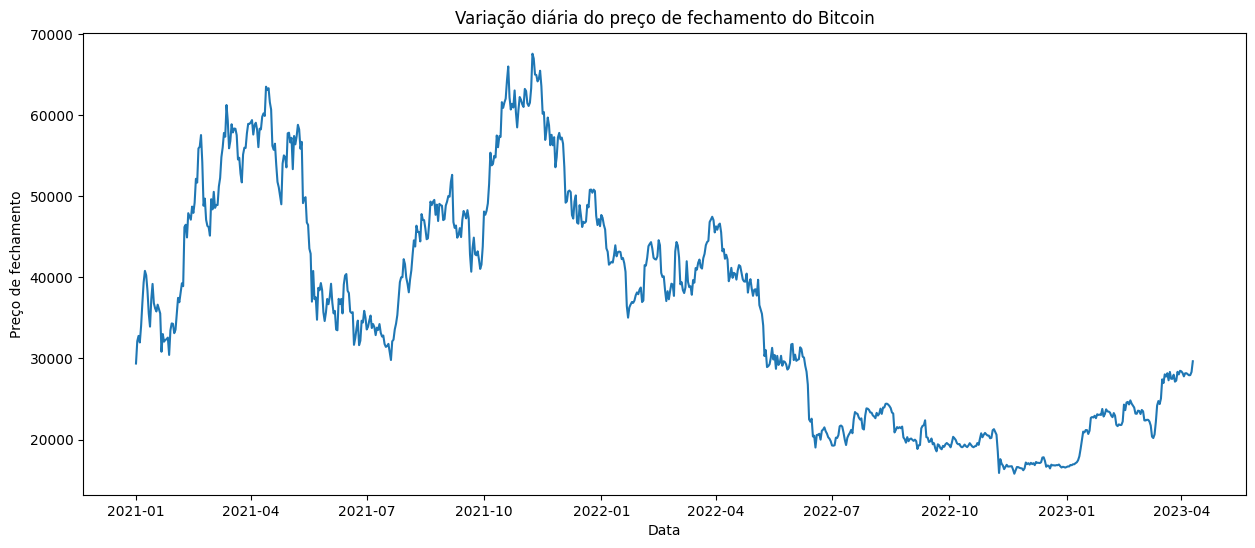

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Fechamento'])
plt.title('Variação diária do preço de fechamento do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento')
plt.show()

Podemos observar que, ao longo do tempo, houve períodos de grande valorização e também de queda no preço do Bitcoin.

Vamos agora gerar um gráfico da média móvel de 30 dias do preço de fechamento. Este código gera um gráfico com a variação diária do preço de fechamento do Bitcoin e a média móvel de 30 dias:

Podemos observar que a média móvel suaviza as variações diárias do preço de fechamento, permitindo uma visualização mais clara da tendência de alta ou baixa do Bitcoin ao longo do tempo.

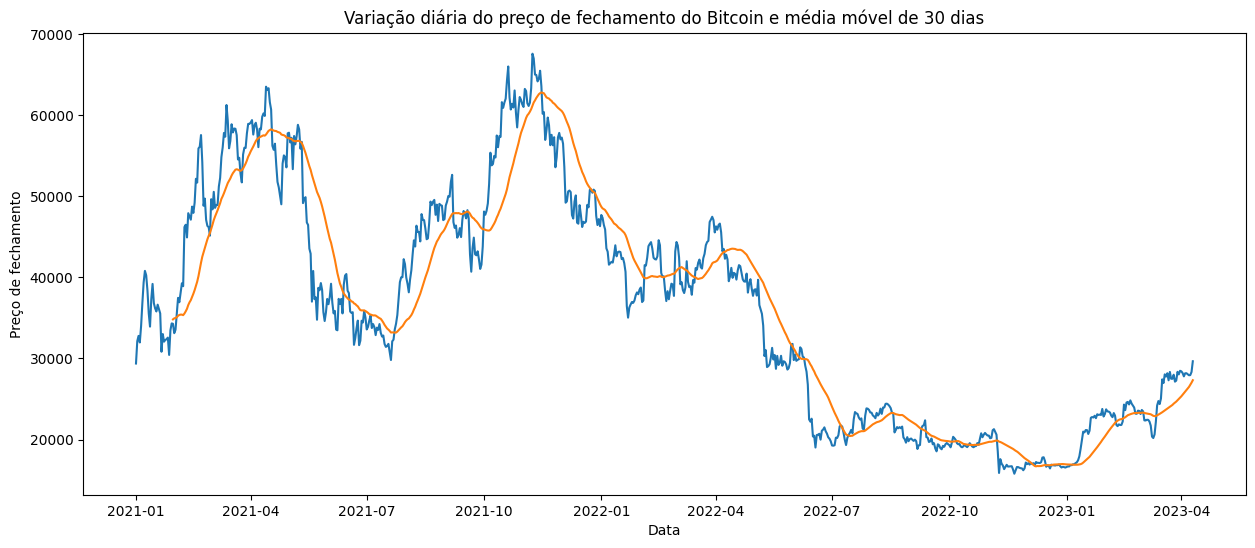

In [ ]:
df['Média Móvel 30 Dias'] = df['Fechamento'].rolling(window=30).mean()

plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df[['Fechamento', 'Média Móvel 30 Dias']])
plt.title('Variação diária do preço de fechamento do Bitcoin e média móvel de 30 dias')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento')
plt.show()

Vamos analisar a valorização diária do Bitcoin:

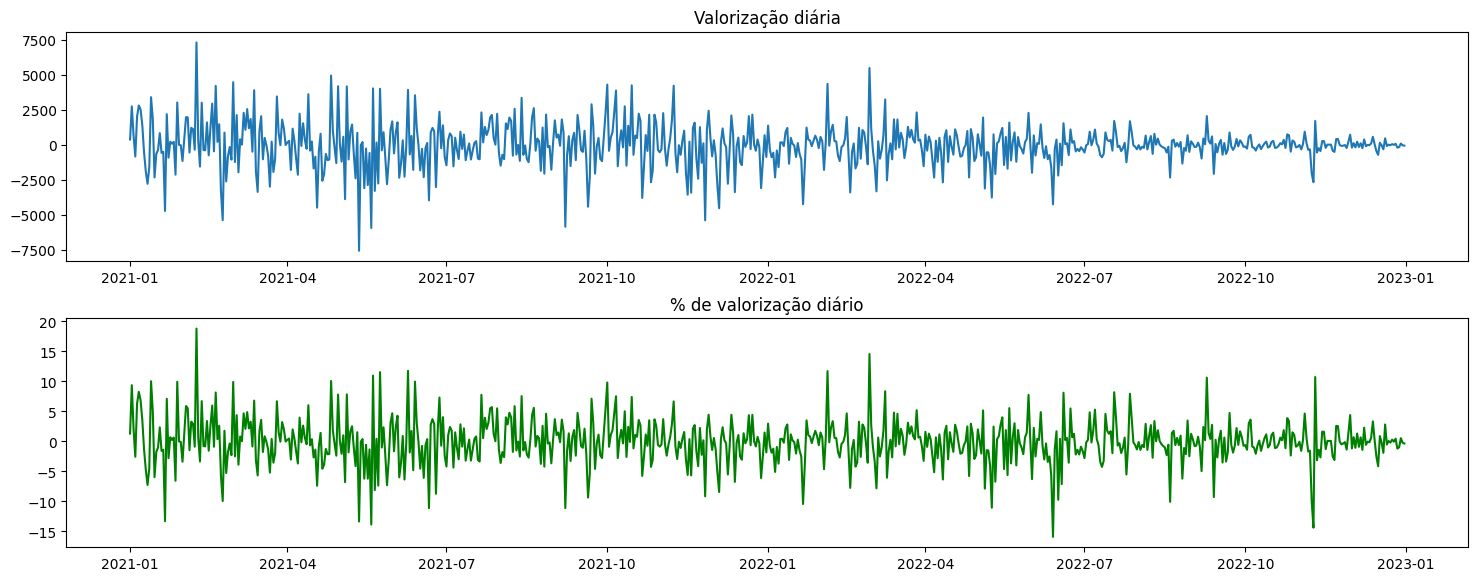

In [ ]:
# Criando os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))
fig.tight_layout(pad=2.0)

ax1.plot(df['Date'], df['Valorizacao'])
ax1.set_title('Valorização diária')
ax2.plot(df['Date'], df['% diario'], color='g')
ax2.set_title('% de valorização diário')

# Exibindo os gráficos
plt.show()


Por fim, vamos gerar um gráfico de barras com o valorização, ou não, da moeda no período.

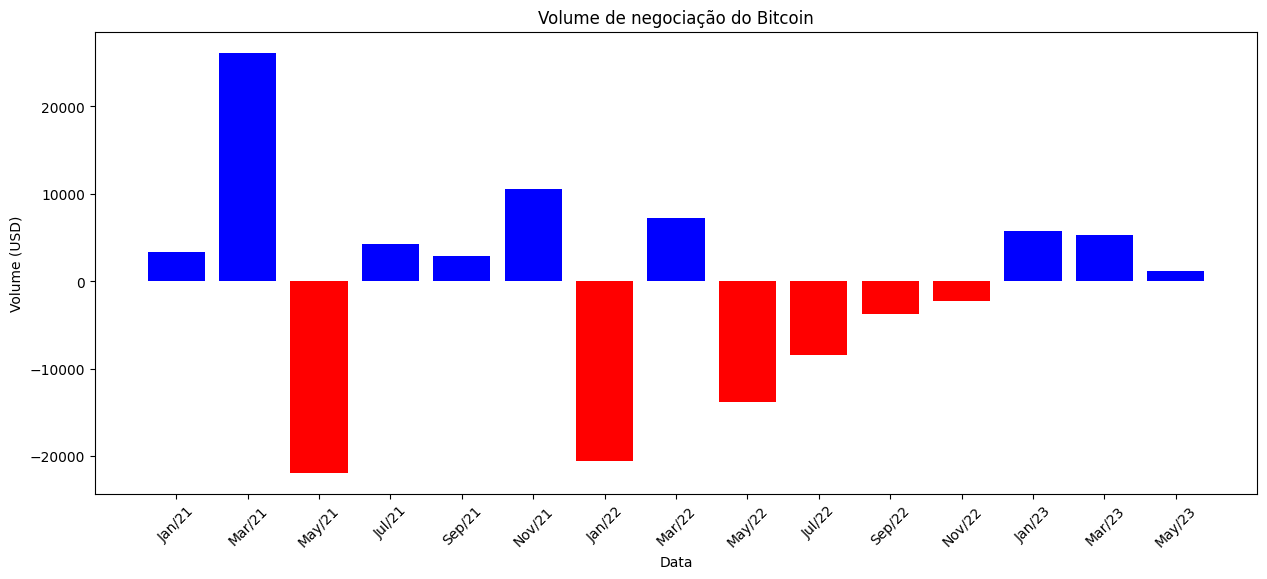

In [ ]:
plt.figure(figsize=(15, 6))

df['Date'] = pd.to_datetime(df['Date'])
dg = df.groupby(pd.Grouper(key='Date', freq='2M')).sum()
dg.index = dg.index.strftime('%b/%y')

colors = ["blue" if i > 0 else "red" for i in dg['Valorizacao']]

plt.bar(dg.index, dg['Valorizacao'] , color=colors)
plt.title('Volume de negociação do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Volume (USD)')

plt.xticks(rotation = 45)
plt.show()

O gráfico apresenta barras na cor azul quando a valorização foi positiva no período e vermelha, quando negativa. A partir dele é possível verificar que nos

A partir das análises dos gráficos apresentados, podemos observar que o volume de negociação do Bitcoin cresceu significativamente ao longo dos anos, acompanhando o aumento de interesse e adoção da criptomoeda. Nos dois últimos anos, entretanto, a moeda apresntou deslvaloriazação significativa.

Com estes gráficos, podemos visualizar algumas estatísticas interessantes sobre o Bitcoin ao longo do tempo, como a variação diária do preço de fechamento, a tendência de alta ou baixa do Bitcoin ao longo do tempo, a média móvel de 30 dias do preço de fechamento, o volume diário de negociação e a valorização mensal. É importante ressaltar que esses gráficos são apenas algumas das análises possíveis com os dados de histórico de cotações do Bitcoin, e que há diversas outras informações que podem ser extraídas a partir desses dados.